In [1]:
from jLM.RegionBuilder import RegionBuilder
from jLM.RDME import Sim as RDMESim
from jLM.RDME import File as RDMEFile
import jLM

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy  as np

import os

from lm import MpdRdmeSolver
from lm import IntMpdRdmeSolver
from lm import MGPUIntMpdRdmeSolver

import scipy.ndimage as spnd
import ipywidgets as ipw
import h5py
import itertools
import random
import copy

import math
import scipy as sp
import scipy.spatial

import csv
import pandas as pd

from collections import defaultdict, OrderedDict

In [2]:
filename = './testX_profile.lm'

xd = int(128)
yd = int(64)
zd = int(64)

sim = RDMESim("JCVI-syn3A",
              filename,
              [xd,yd,zd],
              8e-9,
              "external",
              "Int")

replicates = 1

sim.timestep = 30e-6
sim.simulationTime=0.09 #s
sim.latticeWriteInterval=int(100) #steps
sim.speciesWriteInterval=int(100) #steps

build = RegionBuilder(sim)

Int
RESIZING!!!
Int  lattice initialized


In [3]:
left = sim.region("left")
right = sim.region("right")
external = sim.region("external")
internal = sim.region("internal")
left_shape = np.full((xd,yd,zd),False)

for i in range(int(xd/2)):
    for j in range(yd):
        for k in range(zd):
            left_shape[i,j,k]=True

right_shape = ~left_shape

external_shape = np.full((xd,yd,zd),False)

for i in range(xd):
    for j in range(yd):
        for k in range(zd):
            external_shape[0,j,k]=True
            external_shape[i,0,k]=True
            external_shape[i,j,0]=True
            
            external_shape[-1,j,k]=True
            external_shape[i,-1,k]=True
            external_shape[i,j,-1]=True

In [4]:
external_shape.shape

(128, 64, 64)

In [5]:
# build.compose(
#     (left, left_shape),
#     (right, right_shape),
#     (external, external_shape))
build.compose(
    (internal, right_shape | left_shape),
    (external, external_shape))

In [6]:
# RegionBuilder.showBinaryLattices(

#     dict(
#         left = left_shape,
#         right = right_shape,
#         external = external_shape
#     )
# )

In [7]:
# sim.transitionRate(None, sim.region("external"), None, sim.diffusionZero)
# sim.transitionRate(None, None, sim.region("external"), sim.diffusionZero)

# sim.transitionRate(None, sim.region("left"), sim.region("left"), sim.diffusionFast)
# # sim.transitionRate(None, sim.region("left"), sim.region("right"), sim.diffusionFast)
# # sim.transitionRate(None, sim.region("right"), sim.region("left"), sim.diffusionFast)
# sim.transitionRate(None, sim.region("left"), sim.region("right"), sim.diffusionZero)
# sim.transitionRate(None, sim.region("right"), sim.region("left"), sim.diffusionZero)
# sim.transitionRate(None, sim.region("right"), sim.region("right"), sim.diffusionFast)b

In [8]:
sim.transitionRate(None, None, None, sim.diffusionZero)
sim.transitionRate(None, sim.region("internal"), sim.region("internal"), sim.diffusionFast)

In [9]:
partL = sim.species('particleL')
# sim.distributeNumber(partL, sim.region('left'), 1000)
sim.distributeNumber(partL, sim.region('internal'), 1000)
partR = sim.species('particleR')
# sim.distributeNumber(partR, sim.region('right'), 1000)
sim.distributeNumber(partR, sim.region('internal'), 1000)

In [10]:
sim.showSpecies('particleL')

In [11]:
#sim.displayGeometry()

In [12]:
#sim

In [13]:
sim.finalize()

In [14]:
break

SyntaxError: 'break' outside loop (668683560.py, line 4)

2024-09-24 15:43:43) Info: Using 56 processor(s) and 2 CUDA device(s) per process.
2024-09-24 15:43:43) Info: Assigning 2.00 processor(s) and 2.00 CUDA device(s) per replicate.
2024-09-24 15:43:43) Info: Data output thread running.
2024-09-24 15:43:44) Info: MPDRDME: Rng seed: top word 3118089765, bottom word 1
2024-09-24 15:43:44) Info: Reinterpreting Lattice Data
2024-09-24 15:43:44) Info: Running mpd rdme simulation with 2 species, 0 reactions, 4 site types for 9.000000e-02 s with tau 3.000000e-05. Writing species at 1000 and lattice at 1000 intervals
2024-09-24 15:43:44) Info: Lattice write time is 0.03000000000000, in steps is 1000
2024-09-24 15:43:44) Info: Next lattice write time is 2000
2024-09-24 15:43:44) Info: Lattice write time is 0.06000000000000, in steps is 2000
2024-09-24 15:43:44) Info: Next lattice write time is 3000
2024-09-24 15:43:44) Info: Lattice write time is 0.09000000000000, in steps is 3000
2024-09-24 15:43:44) Info: Next lattice write time is 4000
2024-09-24


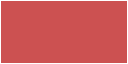

In [15]:
sim.run(solver=MGPUIntMpdRdmeSolver(), cudaDevices=[0,1])

In [ ]:
import numpy as np

from scipy.spatial import KDTree

xyz = np.array([[1,2,3],[1,2,2],[2,1,3],[3,2,1]])

tree = KDTree(xyz)

In [ ]:
tree.query([2,2,1],k=3)[1][0]

In [ ]:
xyz.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from jLM.RDME import File as RDMEFile

In [ ]:
# traj_file = h5py.File('T1_bimolecular.lm ', 'r')
traj = RDMEFile(filename, latticeType="Int")
ts, As = traj.getNumberTrajectory(species="particleL")
ts, Bs = traj.getNumberTrajectory(species="particleR")


In [ ]:
# now visuzlize the trajectories with seaborn and plt
sns.set(style="whitegrid")  
# Create a color palette
palette = sns.color_palette()  
plt.figure(figsize=(10,6))
plt.plot(ts, As, label='particleL',marker='o', linestyle='-',color=palette[0])
plt.plot(ts, Bs, label='particleR',marker='x', linestyle='--',color=palette[1])

plt.title('Trajectories of Biomolecular System uniform distribution')
plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.legend()
plt.savefig('./TutR1.1_bimolecular_uni.png')
plt.show()


In [ ]:
total_molecules = As + Bs
not_equal_2000 = [count for count in total_molecules if count < 2000]

if not_equal_2000:
    print(f"Found elements not equal to 2000: {not_equal_2000}")
else:
    print("All elements in As+Bs are equal to 2000")